## 1. Setup

### 1.1 Mount Google Drive


In [ ]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2 Libraries & Installation


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
import cv2
import numpy as np

!pip install torch torchvision opencv-python scikit-image
!pip install -U torch torchvision

### 1.3 img paths

In [ ]:
img_paths = [
    '/content/drive/MyDrive/CS5330/DeepLearningTalk/cat.jpg',
    '/content/drive/MyDrive/CS5330/DeepLearningTalk/dog.jpg',
    '/content/drive/MyDrive/CS5330/DeepLearningTalk/dogNcat.jpg',
    '/content/drive/MyDrive/CS5330/DeepLearningTalk/dogNcat3.jpg',
    '/content/drive/MyDrive/CS5330/DeepLearningTalk/dogNcat2.jpg',
    '/content/drive/MyDrive/CS5330/DeepLearningTalk/animals.jpg',
]

## 2. Neuro Nets Testing

### 2.1 ResNet50

  1. Predicted class: tiger cat with probability: 45.17%


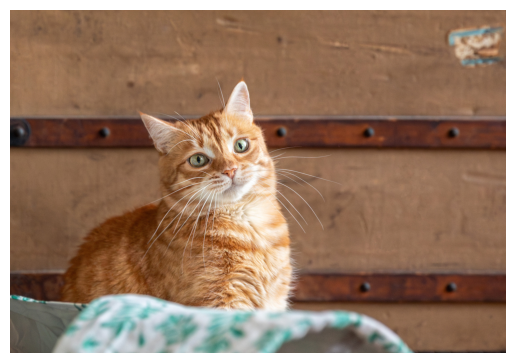

  1. Predicted class: Golden Retriever with probability: 95.60%


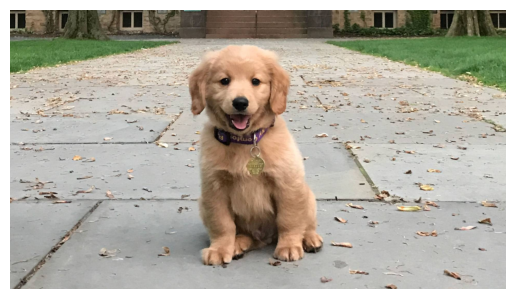

  1. Predicted class: tabby cat with probability: 12.09%


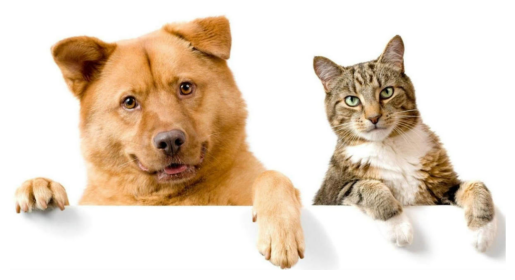

  1. Predicted class: tabby cat with probability: 48.37%


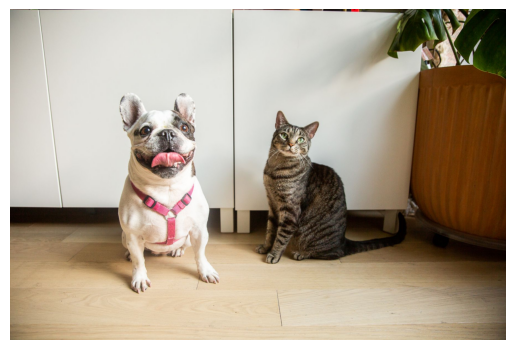

  1. Predicted class: collie with probability: 30.66%


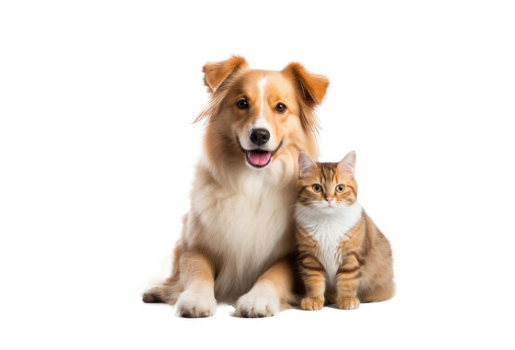

  1. Predicted class: African bush elephant with probability: 79.23%


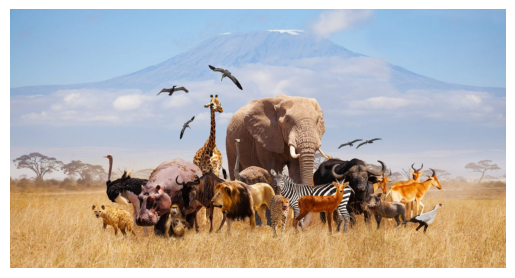

In [ ]:
def resNet50test(image_paths, top_n):
    """Predicts the top N classes of objects in a list of images using ResNet50.

    Args:
        image_paths: A list of image paths.
        top_n: An integer specifying how many top predictions to return per image.

    Returns:
        A list of predictions for each image, including the image path, labels, and probabilities.
    """

    # Load the pre-trained ResNet model
    model = models.resnet50(pretrained=True)
    model.eval()  # Set the model to evaluation mode

    # Define the transformation for the input image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load the class labels
    LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
    labels = requests.get(LABELS_URL).json()

    all_predictions = []
    for image_path in image_paths:
        # Load and preprocess the image
        image = Image.open(image_path)
        image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension

        # Make predictions
        with torch.no_grad():
            outputs = model(image_tensor)

        # Apply softmax to get probabilities
        probabilities = torch.nn.functional.softmax(outputs, dim=1)

        # Get the top n predictions
        top_probs, top_indices = torch.topk(probabilities, k=top_n)

        # Store the top predictions for this image
        predictions = []
        for i in range(top_n):
            predicted_label = labels[top_indices[0][i].item()]
            predicted_prob = top_probs[0][i].item()
            predictions.append((predicted_label, predicted_prob))

        # Append the predictions to the list
        all_predictions.append((image_path, predictions))

    return all_predictions

predictions = resNet50test(img_paths, 1)

# Print the predictions for each image
for image_path, preds in predictions:
    # Loop through the top predictions
    for i, (predicted_label, top_prob) in enumerate(preds):
        print(f"  {i+1}. Predicted class: {predicted_label} with probability: {top_prob * 100:.2f}%")

    # Display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


### 2.1.1 ResNet50 +possibilities

  1. Predicted class: tiger cat with probability: 45.17%
  2. Predicted class: tabby cat with probability: 26.86%
  3. Predicted class: Egyptian Mau with probability: 16.46%
  4. Predicted class: plastic bag with probability: 0.92%
  5. Predicted class: doormat with probability: 0.78%


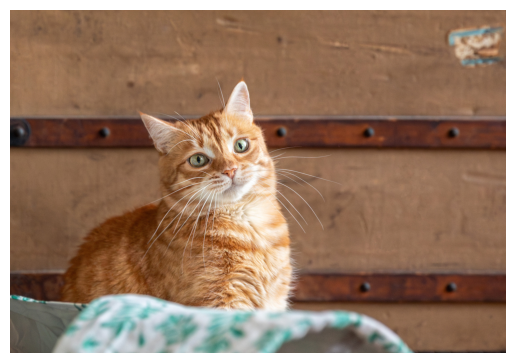

  1. Predicted class: Golden Retriever with probability: 95.60%
  2. Predicted class: Labrador Retriever with probability: 3.58%
  3. Predicted class: Cocker Spaniels with probability: 0.10%
  4. Predicted class: Chesapeake Bay Retriever with probability: 0.09%
  5. Predicted class: tennis ball with probability: 0.08%


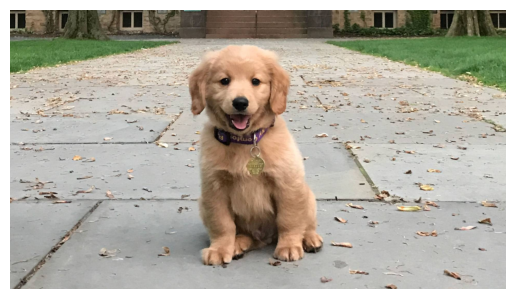

  1. Predicted class: tabby cat with probability: 12.09%
  2. Predicted class: Egyptian Mau with probability: 9.29%
  3. Predicted class: tiger cat with probability: 9.02%
  4. Predicted class: tub with probability: 5.26%
  5. Predicted class: bathtub with probability: 4.53%


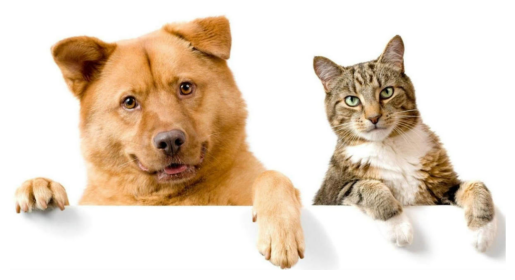

  1. Predicted class: tabby cat with probability: 48.37%
  2. Predicted class: Egyptian Mau with probability: 16.07%
  3. Predicted class: tiger cat with probability: 10.90%
  4. Predicted class: French Bulldog with probability: 5.19%
  5. Predicted class: Boston Terrier with probability: 3.09%


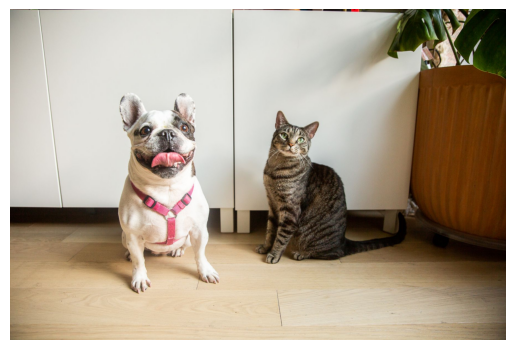

  1. Predicted class: collie with probability: 30.66%
  2. Predicted class: Border Collie with probability: 6.68%
  3. Predicted class: Cardigan Welsh Corgi with probability: 5.57%
  4. Predicted class: tabby cat with probability: 5.10%
  5. Predicted class: Pembroke Welsh Corgi with probability: 3.66%


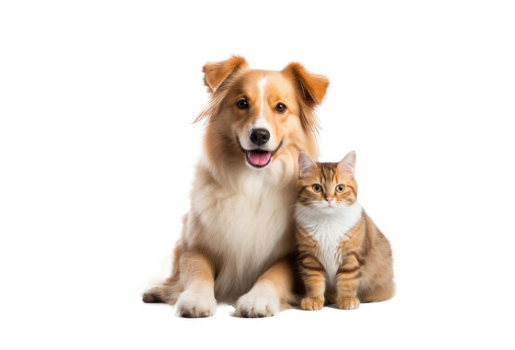

  1. Predicted class: African bush elephant with probability: 79.23%
  2. Predicted class: Asian elephant with probability: 6.59%
  3. Predicted class: tusker with probability: 3.59%
  4. Predicted class: ram with probability: 0.70%
  5. Predicted class: warthog with probability: 0.56%


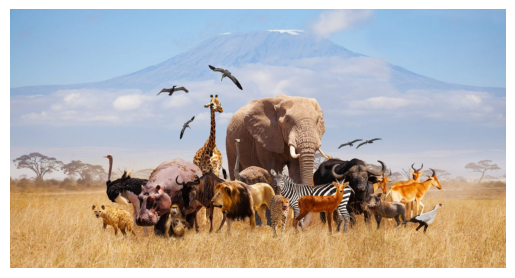

In [ ]:
predictions = resNet50test(img_paths, 5)

# Print the predictions for each image
for image_path, preds in predictions:
    # Loop through the top predictions
    for i, (predicted_label, top_prob) in enumerate(preds):
        print(f"  {i+1}. Predicted class: {predicted_label} with probability: {top_prob * 100:.2f}%")

    # Display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### 2.2 RCNN - based on ResNet50 (COCO dataset)

  1. Detected: dog with confidence: 99.75%


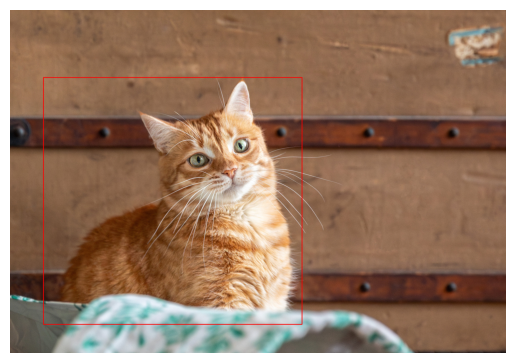

  1. Detected: horse with confidence: 99.85%


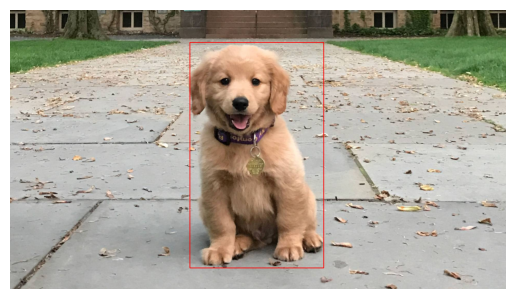

  1. Detected: dog with confidence: 99.66%
  2. Detected: horse with confidence: 99.13%
  3. Detected: horse with confidence: 92.45%


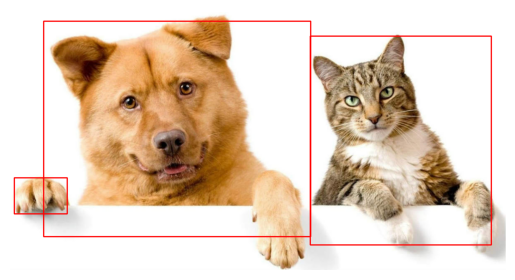

  1. Detected: horse with confidence: 99.93%
  2. Detected: dog with confidence: 99.90%


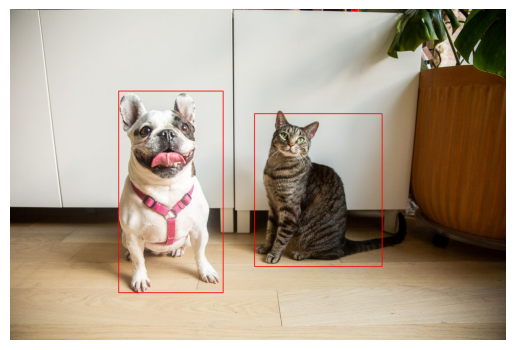

  1. Detected: horse with confidence: 99.00%
  2. Detected: dog with confidence: 98.83%
  3. Detected: dog with confidence: 97.18%


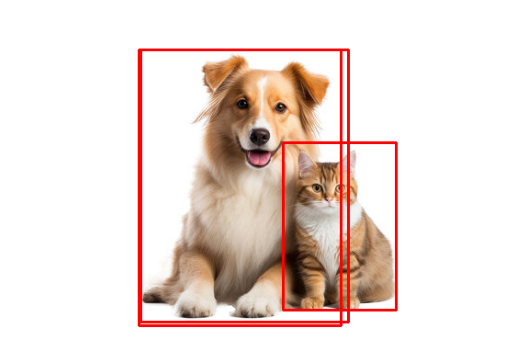

  1. Detected: bear with confidence: 99.86%
  2. Detected: giraffe with confidence: 99.65%
  3. Detected: cat with confidence: 99.62%
  4. Detected: cat with confidence: 98.59%
  5. Detected: backpack with confidence: 97.89%
  6. Detected: cat with confidence: 97.58%
  7. Detected: cat with confidence: 97.32%
  8. Detected: cow with confidence: 97.05%
  9. Detected: cat with confidence: 96.67%
  10. Detected: elephant with confidence: 96.48%
  11. Detected: cow with confidence: 95.88%
  12. Detected: elephant with confidence: 91.33%
  13. Detected: cat with confidence: 90.22%


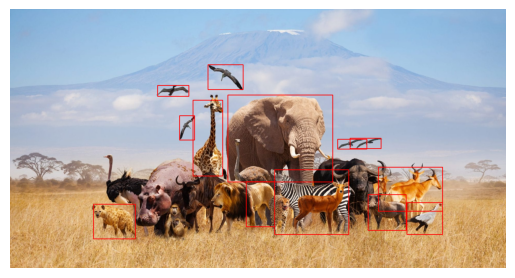

In [ ]:
# Define COCO labels (80 classes)
coco_labels = [
    "__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus",
    "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter",
    "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra",
    "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis",
    "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
    "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon",
    "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza",
    "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "TV",
    "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster",
    "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier",
    "toothbrush"
]

# Define the transformation for the input image
transform = transforms.Compose([
    transforms.ToTensor()
])

# Function to apply Faster R-CNN on a list of images with confidence threshold
def fasterRCNNtest(image_paths, confidence_threshold=0.9):
    """Predicts objects in a list of images using Faster R-CNN.

    Args:
        image_paths: A list of image paths.
        confidence_threshold: Confidence threshold for displaying predictions.

    Returns:
        A list of predictions (bounding boxes, labels, and scores) for each image.
    """

    # Load the pre-trained Faster R-CNN model
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()  # Set the model to evaluation mode

    all_predictions = []

    for image_path in image_paths:
        # Load and preprocess the image
        image = Image.open(image_path)
        image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension

        # Make predictions
        with torch.no_grad():
            outputs = model(image_tensor)

        # Extract bounding boxes, labels, and scores
        boxes = outputs[0]['boxes'].cpu().numpy()
        labels = outputs[0]['labels'].cpu().numpy()
        scores = outputs[0]['scores'].cpu().numpy()

        image_predictions = []

        # Collect predictions above the confidence threshold
        for box, label, score in zip(boxes, labels, scores):
            if score >= confidence_threshold:
                coco_label = coco_labels[label]
                image_predictions.append((coco_label, score, box))

        all_predictions.append((image_path, image_predictions))

    return all_predictions

confidence_threshold = 0.9

# Get predictions for the images
predictions = fasterRCNNtest(img_paths, confidence_threshold)

# Print the predictions and visualize the images with bounding boxes
for image_path, preds in predictions:
    # Load the image for visualization
    image_cv = cv2.imread(image_path)
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

    for i, (label, score, box) in enumerate(preds):
        print(f"  {i+1}. Detected: {label} with confidence: {score * 100:.2f}%")

        # Draw the bounding box
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_cv, (x1, y1), (x2, y2), (255, 0, 0), 2)
        # cv2.putText(image_cv, f'{label}: {score * 100:.2f}%', (x1, y1-5),
        #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(image_cv)
    plt.axis('off')
    plt.show()

### 2.2.1 RCNN - based on ResNet50 (COCO dataset) + ResNet

Top prediction for cropped image 1: African bush elephant: 90.85%
Top prediction for cropped image 2: zebra: 29.95%
Top prediction for cropped image 3: black grouse: 39.77%
Top prediction for cropped image 4: hatchet: 37.16%
Top prediction for cropped image 5: black grouse: 25.82%
Top prediction for cropped image 6: muzzle: 20.52%
Top prediction for cropped image 7: hatchet: 9.46%
Top prediction for cropped image 8: hyena: 68.31%
Top prediction for cropped image 9: paper knife: 86.04%
Top prediction for cropped image 10: plastic bag: 18.65%
Top prediction for cropped image 11: triceratops: 13.00%
Top prediction for cropped image 12: Mexican hairless dog: 65.95%
Top prediction for cropped image 13: hatchet: 46.98%


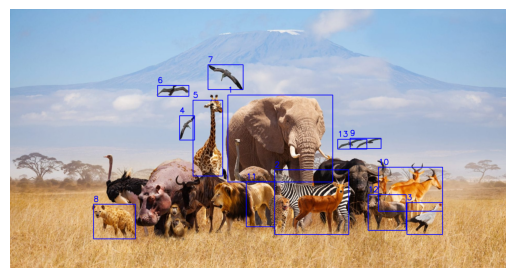

In [ ]:
# Load the pre-trained Faster R-CNN model for region detection
faster_rcnn_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()

# Load the pre-trained ResNet model for classification
resnet_model = models.resnet50(pretrained=True)
resnet_model.eval()

# Define the transformation for the ResNet input
resnet_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess an image
image_path = '/content/drive/MyDrive/CS5330/DeepLearningTalk/animals.jpg'  # Provide your own image path
image = Image.open(image_path)
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Transform the image for Faster R-CNN
image_tensor = transforms.ToTensor()(image).unsqueeze(0)  # Add a batch dimension

# Make predictions with Faster R-CNN
with torch.no_grad():
    outputs = faster_rcnn_model(image_tensor)

# Extract bounding boxes, labels, and scores
boxes = outputs[0]['boxes'].cpu().numpy()
# labels = outputs[0]['labels'].cpu().numpy()
scores = outputs[0]['scores'].cpu().numpy()

# Initialize a counter for the cropped images
image_counter = 1

# Loop through detected boxes, crop and classify them
for score, box in zip(scores, boxes):
    if score > 0.9:  # Filter for high confidence detections
        x1, y1, x2, y2 = map(int, box)

        # Crop the image using the bounding box
        cropped_image = image_cv[y1:y2, x1:x2]

        # Transform the cropped image for ResNet
        cropped_image_pil = Image.fromarray(cropped_image)
        resnet_input = resnet_transform(cropped_image_pil).unsqueeze(0)  # Add batch dimension

        # Make predictions with ResNet
        with torch.no_grad():
            resnet_outputs = resnet_model(resnet_input)

        # Apply softmax to get probabilities
        probabilities = torch.nn.functional.softmax(resnet_outputs, dim=1)

        # Get the top 1 prediction
        top_probs, top_indices = torch.topk(probabilities, k=1)

        # Load class labels for ImageNet
        LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
        imagenet_labels = requests.get(LABELS_URL).json()

        # Show the top prediction for the cropped image
        print(f"Top prediction for cropped image {image_counter}: {imagenet_labels[top_indices[0][0]]}: {top_probs[0][0].item() * 100:.2f}%")

        # Visualize the bounding box on the original image
        cv2.rectangle(image_cv, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw a blue rectangle
        cv2.putText(image_cv, str(image_counter), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Increment the counter
        image_counter += 1

# Display the image with bounding boxes in its original size
plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis('off')  # Hide the axis
plt.show()  # Show the original-sized image

Top prediction for cropped image 1: Egyptian Mau: 48.00%


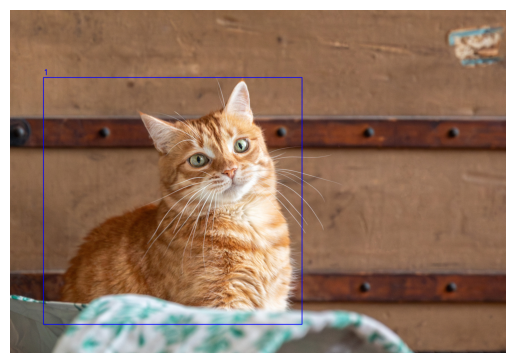

Top prediction for cropped image 1: Kuvasz: 86.68%


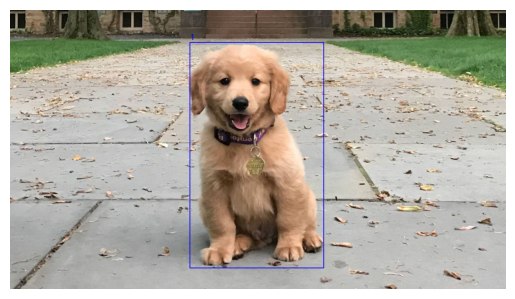

Top prediction for cropped image 1: Egyptian Mau: 61.78%
Top prediction for cropped image 2: Norwegian Elkhound: 59.43%
Top prediction for cropped image 3: Angora rabbit: 28.01%


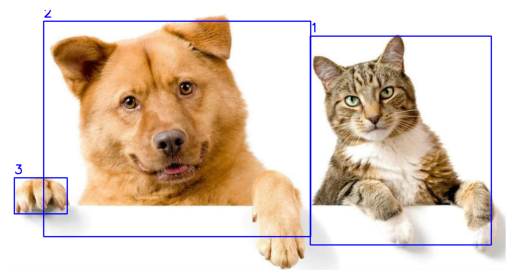

Top prediction for cropped image 1: pug: 78.74%
Top prediction for cropped image 2: tabby cat: 70.28%


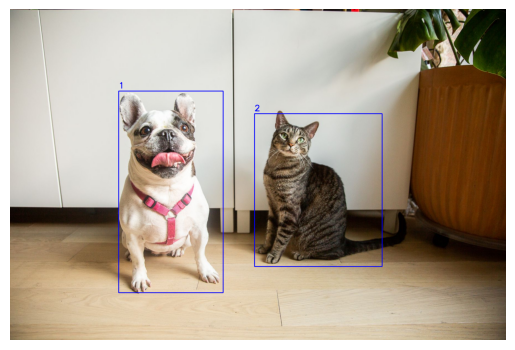

Top prediction for cropped image 1: Border Collie: 33.86%
Top prediction for cropped image 2: Egyptian Mau: 71.16%
Top prediction for cropped image 3: Border Collie: 22.17%


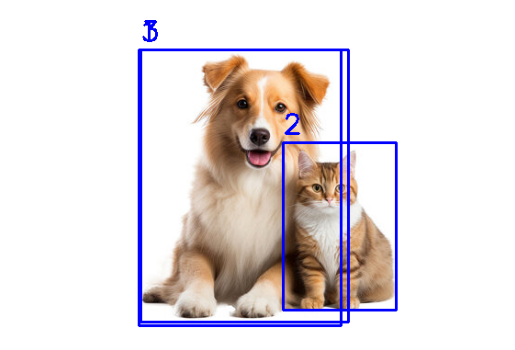

Top prediction for cropped image 1: African bush elephant: 90.85%
Top prediction for cropped image 2: zebra: 29.95%
Top prediction for cropped image 3: black grouse: 39.77%
Top prediction for cropped image 4: hatchet: 37.16%
Top prediction for cropped image 5: black grouse: 25.82%
Top prediction for cropped image 6: muzzle: 20.52%
Top prediction for cropped image 7: hatchet: 9.46%
Top prediction for cropped image 8: hyena: 68.31%
Top prediction for cropped image 9: paper knife: 86.04%
Top prediction for cropped image 10: plastic bag: 18.65%
Top prediction for cropped image 11: triceratops: 13.00%
Top prediction for cropped image 12: Mexican hairless dog: 65.95%
Top prediction for cropped image 13: hatchet: 46.98%


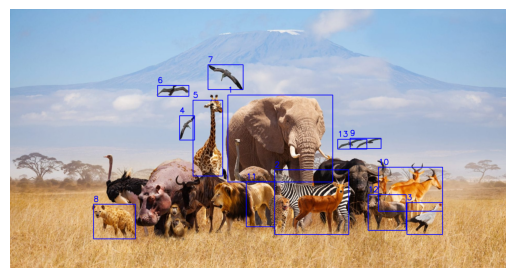

In [ ]:
# Load ImageNet labels
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
imagenet_labels = requests.get(LABELS_URL).json()

# Define the transformations for ResNet input
resnet_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the pre-trained Faster R-CNN model for region detection
faster_rcnn_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()

# Load the pre-trained ResNet model for classification
resnet_model = models.resnet50(pretrained=True)
resnet_model.eval()

def process_images(image_paths, confidence_threshold=0.9):
    """
    Process a list of images, detect regions using Faster R-CNN, crop them,
    and classify each cropped region using ResNet.

    Args:
        image_paths: List of paths to the images.
        confidence_threshold: Minimum confidence score for detected objects.

    Returns:
        None, but prints classification results and displays images with bounding boxes.
    """
    for image_path in image_paths:
        # Load and preprocess the image
        image = Image.open(image_path)
        image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # Transform the image for Faster R-CNN
        image_tensor = transforms.ToTensor()(image).unsqueeze(0)

        # Make predictions with Faster R-CNN
        with torch.no_grad():
            outputs = faster_rcnn_model(image_tensor)

        # Extract bounding boxes, labels, and scores
        boxes = outputs[0]['boxes'].cpu().numpy()
        scores = outputs[0]['scores'].cpu().numpy()

        image_counter = 1

        # Loop through detected boxes, crop, and classify them
        for score, box in zip(scores, boxes):
            if score >= confidence_threshold:
                x1, y1, x2, y2 = map(int, box)

                # Crop the image using the bounding box
                cropped_image = image_cv[y1:y2, x1:x2]

                # Transform the cropped image for ResNet
                cropped_image_pil = Image.fromarray(cropped_image)
                resnet_input = resnet_transform(cropped_image_pil).unsqueeze(0)

                # Make predictions with ResNet
                with torch.no_grad():
                    resnet_outputs = resnet_model(resnet_input)

                # Apply softmax to get probabilities
                probabilities = torch.nn.functional.softmax(resnet_outputs, dim=1)

                # Get the top 1 prediction
                top_probs, top_indices = torch.topk(probabilities, k=1)

                # Show the top prediction for the cropped image
                print(f"Top prediction for cropped image {image_counter}: {imagenet_labels[top_indices[0][0]]}: {top_probs[0][0].item() * 100:.2f}%")

                # Visualize the bounding box on the original image
                cv2.rectangle(image_cv, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image_cv, str(image_counter), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

                image_counter += 1

        # Display the image with bounding boxes
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide the axis
        plt.show()

# Example usage:
confidence_threshold = 0.9
process_images(img_paths, confidence_threshold)

In [ ]:
!pip install gradio

import gradio as gr
import requests
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import numpy as np
import cv2

# Load ImageNet labels
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
imagenet_labels = requests.get(LABELS_URL).json()

# Define the transformations for ResNet input
resnet_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the pre-trained models
faster_rcnn_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()

resnet_model = models.resnet50(pretrained=True)
resnet_model.eval()

def process_image(image, confidence_threshold=0.9):
    """
    Detects regions using Faster R-CNN, crops them, and classifies each cropped region using ResNet.

    Args:
        image: PIL image uploaded by user.
        confidence_threshold: Minimum confidence score for detected objects.

    Returns:
        Processed image with bounding boxes and a string of classification results.
    """
    # Convert PIL image to OpenCV format for display
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    image_tensor = transforms.ToTensor()(image).unsqueeze(0)

    # Make predictions with Faster R-CNN
    with torch.no_grad():
        outputs = faster_rcnn_model(image_tensor)

    boxes = outputs[0]['boxes'].cpu().numpy()
    scores = outputs[0]['scores'].cpu().numpy()
    results_text = ""

    for idx, (score, box) in enumerate(zip(scores, boxes)):
        if score >= confidence_threshold:
            x1, y1, x2, y2 = map(int, box)

            # Crop the image using the bounding box
            cropped_image = image_cv[y1:y2, x1:x2]
            cropped_image_pil = Image.fromarray(cropped_image)
            resnet_input = resnet_transform(cropped_image_pil).unsqueeze(0)

            # Make predictions with ResNet
            with torch.no_grad():
                resnet_outputs = resnet_model(resnet_input)

            # Get the top prediction
            probabilities = F.softmax(resnet_outputs, dim=1)
            top_probs, top_indices = torch.topk(probabilities, k=1)
            label = imagenet_labels[top_indices[0][0].item()]
            confidence = top_probs[0][0].item() * 100

            # Append result to the results text
            results_text += f"Object {idx + 1}: {label} ({confidence:.2f}%)\n"

            # Draw bounding box on the original image
            cv2.rectangle(image_cv, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image_cv, f"{label}: {confidence:.2f}%", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Convert the image back to RGB for Gradio display
    final_image = Image.fromarray(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
    return final_image, results_text

# Create Gradio interface with separate image and text outputs
gr.Interface(
    fn=process_image,
    inputs=[
        gr.Image(type="pil"),
        gr.Slider(0.5, 1.0, step=0.05, label="Confidence Threshold")
    ],
    outputs=[
        "image",
        gr.Textbox(label="Detection Results")
    ],
    title="Deep Learning Demo",
    description="Upload an image, set the confidence threshold, and see the detected objects with labels.",
).launch()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get 

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1a0ef1cebf485375d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
